<a href="https://colab.research.google.com/github/GitHub-Bong/Toxic-Comment-Challenge/blob/master/0404_focus_on_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount, Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
import sys, os, re, string, csv, codecs, numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, SpatialDropout1D, concatenate
from tensorflow.keras.layers import GRU, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers

------

# Load Data

In [ ]:
train = pd.read_csv('/content/drive/Shareddrives/SOGANG Parrot/train.csv/train.csv')
test = pd.read_csv('/content/drive/Shareddrives/SOGANG Parrot/test.csv/test.csv')

In [ ]:
train.head(3)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0


In [ ]:
train.isnull().values.any(), test.isnull().values.any()

(False, False)

In [ ]:
train.shape, test.shape

((159571, 8), (153164, 2))

---------------

# Preprocessing

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


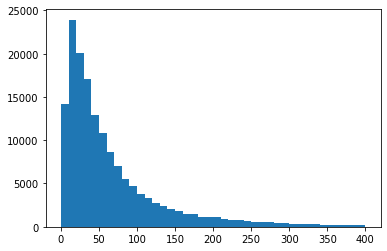

In [ ]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

totalNumWords = [len(one_comment) for one_comment in train["comment_text"].apply(word_tokenize)]
plt.hist(totalNumWords,bins = np.arange(0,410,10))
plt.show()

In [ ]:
train["comment_text"][np.argmax(totalNumWords)]

'YOU!\nYou blocked me worm why!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
del totalNumWords

# 전처리의 중요성 


In [ ]:
for i in [147907, 34, 114, 119, 10067, 63926, 71320]:
  print(test["comment_text"][i])

□□□□□■□□□□□■■■■■■■□■□□□■□□□□ 
  □□□□■□■□□□□■□□□□□■□■□□□■□□□□ 
  □□□■□■□■□□□■□□□□□■□■□■■■■■□□ 
  □□■□□□■□■□□■□□□□□■□■□□□■□□□□ 
  □■□■■■■■□■□■■■■■■■□■□□□■□□□□ 
  □□□□□□□■□□□■□□□□□■□■□□■■■□□□ 
  □□□□□□■□□□□■□□□□□■□■□■□■□■□□ 
  □□□□□■□□□□□■■■■■■■□■□□■□□■□□
일이삼사오육칠팔구하고십이요 에헤헤 으헤 으헤 으허허
পরিচয়   

 নাম-মোঃফরহাদ ইসলাম 
 পিতা-মোঃ শাহজাহান মিয়া 
 মাতা-মোছাঃফাহিমা বেগম 
 গ্রামঃ জানকিপুর সলই মন্ডল পাড়া 
 ইউনিয়নঃনিলাখিয়া 
 উপজেলাঃবকশীগঞ্জ 
 জেলাঃজামালপুর  
 বিভাগঃঢাকা 

  
     ।।।।।।।।।।।।।।। 

  

 আমি ১৯৯৭ সালের ২০.জানুয়ারি আমার নানার বাড়িতে জন্মগ্রহণ করি। ২০০০ সালে নিজ গ্রামের স্কুলে ভর্তি হয় এবং ওই স্কুল থেকেই প্রাইমারি লেবেল শেষ করি।২০০৬ সালে ভর্তি নিজ ইউনিয়নের নিলাখিয়া আর জে পাইলট উচ্চ বিদ্যালয়ে ৬ষ্ঠ শ্রেনীতে এবং সেখানে ক্লাস এইট পর্যন্ত পড়ি।। পরে ভর্তি হই বকশীগঞ্জ টি.ভি.আই  এ সেখান থেকে ২০১২ সালে এস এস সি পাশ করি।তার পর টেক্সটাইল এ ডিপ্লোমা করার জন্য ভর্তি হলাম শহীদ আব্দুর রব সেরনিয়াবাত টেক্সটাইল ইঞ্জিনিয়ারিং কলেজ,বরিশাল। বর্তমানে আমি এই কলেজে ৬ষ্ঠ সেমিস্টার এর এক জন ছাত্র।।
ا

In [ ]:
num = 0
for i in range(train.shape[0]):
  a = re.compile(r'\S+\.jpg|\(UTC\)')
  if a.search(train['comment_text'][i]):
    num += 1
num

7387

-------------

-----------

## Capitalization / Lower case

In [ ]:
train["preprocessed_text"] = train["comment_text"].apply(lambda x: x.lower())
test["preprocessed_text"] = test["comment_text"].apply(lambda x: x.lower())

In [ ]:
print('Before : ', train["comment_text"][4])
print('\n~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~\n')
print('After  : ', train["preprocessed_text"][4])

Before :  You, sir, are my hero. Any chance you remember what page that's on?

~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~

After  :  you, sir, are my hero. any chance you remember what page that's on?


----------------

## Remove ~.jpg , (UTC)

In [ ]:
train["preprocessed_text"] = train["preprocessed_text"].apply(lambda x: re.sub(r"\S+\.jpg|\(UTC\)", " ", x))
test["preprocessed_text"] = test["preprocessed_text"].apply(lambda x: re.sub(r"\S+\.jpg|\(UTC\)", " ", x))

## Expand the Contractions

In [ ]:
!pip install contractions
import contractions

train["preprocessed_text"] = train["preprocessed_text"].apply(lambda x: contractions.fix(x))
test["preprocessed_text"] = test["preprocessed_text"].apply(lambda x: contractions.fix(x))

In [ ]:
print('Before : ', train["comment_text"][17000])
print('\n~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~\n')
print('After  : ', train["preprocessed_text"][17000])

Before :  "

Ohh, I didn't thought that situation is that bad you being gay. I'm sorry for you fagg.
    —Preceding unsigned comment added by 95.68.45.58   "

~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~

After  :  "

ohh, i did not thought that situation is that bad you being gay. I am sorry for you fagg.
    —preceding unsigned comment added by 95.68.45.58   "


-------------

## Remove URLs

In [ ]:
train["preprocessed_text"] = train["preprocessed_text"].apply(lambda x: re.sub(r"https?://\S+|www\.\S+", " ", x))
test["preprocessed_text"] = test["preprocessed_text"].apply(lambda x: re.sub(r"https?://\S+|www\.\S+", " ", x))

In [ ]:
print('Before : ', train["comment_text"][228])
print('\n~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~\n')
print('After  : ', train["preprocessed_text"][228])

Before :  http://www.users.bigpond.com/MONTDALE/page8.html  Heritage from village Κρανιώνας in macedonian Дреновени. Sources claim that the village was pure Slavic.

~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~

After  :     heritage from village κρανιώνας in macedonian дреновени. sources claim that the village was pure slavic.


---------

## Remove HTML tags

In [ ]:
train["preprocessed_text"] = train["preprocessed_text"].apply(lambda x: re.sub(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});", " ", x))
test["preprocessed_text"] = test["preprocessed_text"].apply(lambda x: re.sub(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});", " ", x))

In [ ]:
print('Before : ', train["comment_text"][109313][:50])
print('\n~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~\n')
print('After  : ', train["preprocessed_text"][109313][:50])

Before :  "
 < Archive 6 Archive 7 Archive 8 >


 Vandalism 

~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~

After  :  "
  


 vandalism 
why? to lower your wikistress!!


------------

## Remove Non-ASCI

In [ ]:
train["preprocessed_text"] = train["preprocessed_text"].apply(lambda x: re.sub(r'[^\x00-\x7f]',' ', x))
test["preprocessed_text"] = test["preprocessed_text"].apply(lambda x: re.sub(r'[^\x00-\x7f]',' ', x))

In [ ]:
print('Before : ', train["comment_text"][144169])
print('\n~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~\n')
print('After  : ', train["preprocessed_text"][144169])

Before :  "

I SEE HERE THIS TEAM IS PRESENTED AS ""Черноморeц"", NOT ""Чорноморець"" AS YOU CLAIM. Furthermore, the registered site (under "".ua"" tld) is ""chernomorets"". "

~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~

After  :  "

i see here this team is presented as ""        e "", not ""           "" as you claim. furthermore, the registered site (under "".ua"" tld) is ""chernomorets"". "


In [ ]:
print('Before : ', train["comment_text"][8468])
print('\n~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~\n')
print('After  : ', train["preprocessed_text"][8468])

Before :  "
Much content was dubiously changed and made what appeared to be changes to fundamental content of the article that appeared dubious to me.  That coupled with the lack of an informative edit summary I felt that the large scale changing of unsourced and unexplained content was possible vandalism.  Because I was not sure I did not warn you and let you explain your edit.
<3  ♪ Talk ♪  ߷  ♀ Contribs ♀"

~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~

After  :  "
much content was dubiously changed and made what appeared to be changes to fundamental content of the article that appeared dubious to me.  that coupled with the lack of an informative edit summary i felt that the large scale changing of unsourced and unexplained content was possible vandalism.  because i was not sure i did not warn you and let you explain your edit.
<3    talk         contribs  "


---------------

## Remove punctuations

In [ ]:
train["preprocessed_text"] = train["preprocessed_text"].apply(lambda x: re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', " ", x))
test["preprocessed_text"] = test["preprocessed_text"].apply(lambda x: re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', " ", x))

In [ ]:
print('Before : ', train["comment_text"][8580][:200])
print('\n~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~\n')
print('After  : ', train["preprocessed_text"][8580][:200])

Before :  "]]
|}

Semana 9: La Gran Final
;orden de marcha
{| class=""wikitable"" style=""width:80%;""
|-
! Pareja
! Puntaje
! Danza
! Musica
! Result.
|-
| rowspan=3|Kristi & Mark
| 
| Cha-cha-cha
| ""Dancing 

~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~

After  :   
 

semana 9  la gran final
 orden de marcha
  class wikitable  style width 80 
 
  pareja
  puntaje
  danza
  musica
  result 
 
  rowspan 3 kristi   mark
  
  cha cha cha
   dancing on the ceiling 


------------------

## Capitalization / Lower case

In [ ]:
train["preprocessed_text"] = train["preprocessed_text"].apply(lambda x: x.lower())
test["preprocessed_text"] = test["preprocessed_text"].apply(lambda x: x.lower())

In [ ]:
print('Before : ', train["comment_text"][17000])
print('\n~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~\n')
print('After  : ', train["preprocessed_text"][17000])

Before :  "

Ohh, I didn't thought that situation is that bad you being gay. I'm sorry for you fagg.
    —Preceding unsigned comment added by 95.68.45.58   "

~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~

After  :   

ohh  i did not thought that situation is that bad you being gay  i am sorry for you fagg 
     preceding unsigned comment added by 95 68 45 58    


---------------

## Remove stopwords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
train['preprocessed_text'] = train['preprocessed_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
test['preprocessed_text'] = test['preprocessed_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print('Before : ', train["comment_text"][144242])
print('\n~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~\n')
print('After  : ', train["preprocessed_text"][144242])

Before :  I Have Made Changes to the Images/Mosaic Discussion Section 

As you people have known, a huge edit war took place between I and some IP user from Britain, faking to be an embassy worker and a worker for the King of Spain. So here is a section, for discussions regarding the people on the mosaic and infobox simply to prevent another huge edit war from taking place. 

So, I have added Sultan Kudarat in favor of José María of Manila, since is he the only Philippine national hero from the Moro region. Additionally I have also added Said Basher albeit he is a national Islamic imam, in to accompany the existing Roman Catholic priests (San Pedro Calungsod and Francisca del Espíritu Santo Fuentes). This equalizes it, two Roman Catholics and two Muslims. 

Also, I have put Jesús A. Villamor since he was a prominent Filipino fighter during World War II. 

Any opposing opinions, objections should be discussed on this section.   PacificWarrior101

~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~

# 전처리 해서 0되면 기존 문장 사용


In [ ]:
train['preprocessed'] = train.apply(lambda x: x['comment_text'] if len(x['preprocessed_text'].split())==0 else x['preprocessed_text'],axis=1)
test['preprocessed'] = test.apply(lambda x: x['comment_text'] if len(x['preprocessed_text'].split())==0 else x['preprocessed_text'],axis=1)

In [ ]:
print('기존     ', test['comment_text'][147907])
print('전처리 후',test['preprocessed_text'][147907])

print('기존 사용', test['preprocessed'][147907])

기존      □□□□□■□□□□□■■■■■■■□■□□□■□□□□ 
  □□□□■□■□□□□■□□□□□■□■□□□■□□□□ 
  □□□■□■□■□□□■□□□□□■□■□■■■■■□□ 
  □□■□□□■□■□□■□□□□□■□■□□□■□□□□ 
  □■□■■■■■□■□■■■■■■■□■□□□■□□□□ 
  □□□□□□□■□□□■□□□□□■□■□□■■■□□□ 
  □□□□□□■□□□□■□□□□□■□■□■□■□■□□ 
  □□□□□■□□□□□■■■■■■■□■□□■□□■□□
전처리 후 
기존 사용 □□□□□■□□□□□■■■■■■■□■□□□■□□□□ 
  □□□□■□■□□□□■□□□□□■□■□□□■□□□□ 
  □□□■□■□■□□□■□□□□□■□■□■■■■■□□ 
  □□■□□□■□■□□■□□□□□■□■□□□■□□□□ 
  □■□■■■■■□■□■■■■■■■□■□□□■□□□□ 
  □□□□□□□■□□□■□□□□□■□■□□■■■□□□ 
  □□□□□□■□□□□■□□□□□■□■□■□■□■□□ 
  □□□□□■□□□□□■■■■■■■□■□□■□□■□□


-------------------

----------------

# 20개 랜덤 관찰을 통해 추가 전처리 요소 확인

In [ ]:
for i in range(10):
  bong = np.random.randint(159571)
  print(i,'번째 Before : ', train["comment_text"][bong])
  print('\n~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~\n')
  print('\n~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~\n')
  print(i,'번째 After  : ', train["preprocessed_text"][bong])
  print('-------------------------------------------------------------------------------------------------')

In [ ]:
for i in range(10):
  bong = np.random.randint(153164)
  print(i,'번째' ,bong, ' Before : ', test["comment_text"][bong])
  print('\n~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~\n')
  print('\n~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~\n')
  print(i,'번째' ,bong, ' After  : ', test["preprocessed_text"][bong])
  print('-------------------------------------------------------------------------------------------------')

# 2단어 이하로 전처리 된 문장 관찰


*   영어 말고 다른 언어
*   단어가 원래 짧은 거 



In [ ]:
tooshort = list()
for i, s in enumerate(test['preprocessed_text']):
  if len(s.split()) < 3:
    tooshort.append(i)

print(len(tooshort))
for i in range(20):
  r = np.random.randint(len(tooshort))
  print(i,'번째' ,tooshort[r], ' Before : ', test["comment_text"][tooshort[r]])
  print('\n~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~\n')
  print('\n~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~\n')
  print(i,'번째' ,tooshort[r], ' After  : ', test["preprocessed_text"][tooshort[r]])
  print('-------------------------------------------------------------------------------------------------')

7169
0 번째 37944  Before :  suck my dick!!

~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~


~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~

0 번째 37944  After  :  suck dick
-------------------------------------------------------------------------------------------------
1 번째 125771  Before :  *IMDB is crap.

~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~


~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~

1 번째 125771  After  :  imdb crap
-------------------------------------------------------------------------------------------------
2 번째 121539  Before :  Rgds,

~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~


~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~

2 번째 121539  After  :  rgds
-------------------------------------------------------------------------------------------------
3 번째 27973  Before :  his support for Palestinians

~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~


~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~

3 번째 27973  A

# 전처리 되어서 없어진 문장 관찰

In [ ]:
display(train[train['preprocessed_text'].str.len()==0])
print(train[train['preprocessed_text'].str.len()==0].shape)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,preprocessed_text
2407,067638a445ccd93b,"Here, here and here.",0,0,0,0,0,0,
9395,18ed60f8e586bcbd,They do too. their ... -,0,0,0,0,0,0,
12414,20f1529e0c0734cb,You're just at it again!,0,0,0,0,0,0,
19815,3452aa44f93b7ee1,(www.ebenefits.va.gov),0,0,0,0,0,0,
23095,3d09050e81205163,Where was it before?,0,0,0,0,0,0,
26401,45e78dd7ff3c36c5,than just on/off such as on/off/,0,0,0,0,0,0,
31072,528b079a22ccbfb0,!!!!!\nWhat is all of this.,0,0,0,0,0,0,
32019,5518511d0c3faa37,"""\nNo, they DON'T! """,0,0,0,0,0,0,
36755,6228f7166578f2b6,I wont do it again,0,0,0,0,0,0,
38313,664baa9268a34574,what \n\nwhy did you do that!!,0,0,0,0,0,0,


(42, 9)


In [ ]:
test[test['preprocessed_text'].str.len()==0]

,id,comment_text,preprocessed_text
34,000d4f120d5a7303,일이삼사오육칠팔구하고십이요 에헤헤 으헤 으헤 으허허,
114,002c586b0af3792c,পরিচয় \n\n নাম-মোঃফরহাদ ইসলাম \n পিতা-মোঃ শ...,
119,003044a2c35274b6,السلام عليكم و رحمة الله و بركاته الا الجميع \...,
404,00ad0323d9b31f21,"* I'll be there. ,",
419,00b568d3b0f61a37,Радченко ис мы дирты гаы анал сех славе!!,
...,...,...,...
152514,fee0b7add4cb49e3,حينما اكتب لك بالعربية كلامي يبقى وحين اكتب با...,
152562,fef5468c148e51d2,== دومین متن مباحثه با موضوع اختصاصی داعش و اس...,
152705,ff37eca3c02bb566,أسف أخي أي قبل الاسلام ، ولست عربية,
152819,ff6731195127887f,== 蹩脚英语 == \n 英语好烂呀！最近跟维基用户有事要说，无奈几乎不会英语，说不了话。...,


In [ ]:
totalempty = list()
for i, s in enumerate(test['preprocessed_text']):
  if len(s.split()) == 0:
    totalempty.append(i)   # 총 915개 

print(len(totalempty))
for i in range(20):
  r = np.random.randint(len(totalempty))
  print(i,'번째' ,totalempty[r], ' Before : ', test["comment_text"][totalempty[r]])
  print('\n~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~\n')
  print('\n~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~\n')
  print(i,'번째' ,totalempty[r], ' After  : ', test["preprocessed_text"][totalempty[r]])
  print('-------------------------------------------------------------------------------------------------')

915
0 번째 63926  Before :  آخه‌ آدم نفهم همه‌ چی  چرا با این لفظ مسخره‌ ایرانی داری مارو تو دنیا میکنی ایرانی.

~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~


~~~~~~~~~~~~~~~~~Preprocessed~~~~~~~~~~~~~~~~~~~~~~~

0 번째 63926  After  :  
-------------------------------------------------------------------------------------------------
1 번째 68355  Before :  == دومین متن مباحثه با موضوع اختصاصی داعش و اسرائیل == 

 با عرض سلام خدمت ریاست جمهوری اسرائیل و نیز اعضای آن و نیز اقوام و پیروان این دولت،این دومین متن مباحثه ای هست که از مباحثات با موضوع اختصاصی هست و نیز دومین متن مباحثه با موضوع اختصاصی داعش و اسرائیل هست امیدوارم مباحث و مطالب مطرح شده در متن مباحثه اولی مورد توجه شما قرار گرفته باشه که انشالله به امید خدا میگیره چون کسانی که ادعای خداوند و اعتقاد به معبود رو میکنند و نام اشهد ان لا اله الا الله و اشهد ان محمد رسول الله رو درج بر پرچم خود میکنند مسلما به شناخت که نه بهتر بگم به باوری بر مبنای عقیدتی به خداوند رسیدن حتی اگر فرض رو بر این بگیریم که این عقیده از پیشنیان بر گ

In [ ]:
totalempty = list()
for i, s in enumerate(test['comment_text']):   # train에는 없다
  if len(s.split()) == 0:
    totalempty.append(i)   # 총 915개 

print(len(totalempty))
totalempty

1


[55142]

In [ ]:
test['comment_text'][55142]

'\u2003'

In [ ]:
'\u2003'.split()

[]

# TO-DO (나중에 지울 예정)

*   1,2,3 글자 짜리 없애기
*   전처리 해서 0 된거는 어떻게 처리할 것이냐?
  - 번역? 
*   나중에 패딩할 때에 train test 전처리한걸 토크나이즈 해서 길이 분포를 보고 적절한 maxlen 설정하면 좋을 듯 



-------------

-----------------

# 전처리 후 문장의 길이

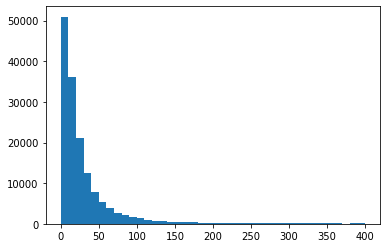

In [ ]:
totalNumWords = [len(one_comment) for one_comment in test["preprocessed"].apply(word_tokenize)]
plt.hist(totalNumWords,bins = np.arange(0,410,10))
plt.show()

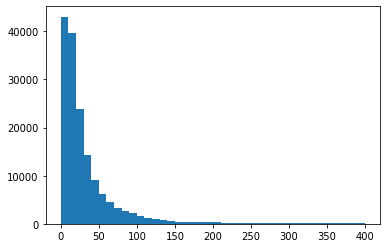

In [ ]:
totalNumWords = [len(one_comment) for one_comment in train["preprocessed"].apply(word_tokenize)]
plt.hist(totalNumWords,bins = np.arange(0,410,10))
plt.show()

---------

---------

# Tokenization

In [ ]:
list_sentences_train = train["preprocessed"] # (159571,)
list_sentences_test = test["preprocessed"] # (153164,)

In [ ]:
max_features = 30000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list_sentences_train)
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
# list_tokenized_train[:1] = [[688,75,1,126,130, ,,, ]]
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)
# list_tokenized_test[:1] = [[2665,655,8849,656, ,,, ]]

# tokenizer.word_counts = OrderedDict([('explanation', 1771),('why', 17818),('the', 496540),('edits', 9957), ,,, ])
# tokenizer.word_index = {'the': 1,'to': 2,'of': 3,'and': 4, ,,, }
len(tokenizer.word_index)

172068

----------

----------

# Padding

In [ ]:
maxlen = 50
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen) # (159571, 50)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen) # (153164, 50)

X_t.shape

(159571, 50)

In [ ]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[list_classes].values # y.shape (159571, 6)
y.shape

(159571, 6)

-----

------

# Pretrained-Embedding-matrix

In [ ]:
embedding_dict = dict()
f = open('/content/drive/Shareddrives/SOGANG Parrot/Pretrained-Embedding-Vector/glove.twitter.27B.200d.txt/glove.twitter.27B.200d.txt', encoding="utf8")

for line in f:
    word_vector = line.split()
    word = word_vector[0]
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32') # 200
    embedding_dict[word] = word_vector_arr
f.close()
print('There are %s Embedding Vectors\n' % len(embedding_dict))

print(embedding_dict['respectable'])
print(len(embedding_dict['respectable']))

embedding_matrix = np.zeros((len(tokenizer.word_index)+1, 200)) # will delete first row

for word, i in tokenizer.word_index.items(): 
    temp = embedding_dict.get(word) 
    if temp is not None:
        embedding_matrix[i] = temp 

print(embedding_matrix.shape)
embedding_matrix = np.delete(embedding_matrix,0,axis=0) # delete first row
print(embedding_matrix.shape)

There are 1193514 Embedding Vectors

[-6.4748e-01 -3.7296e-01 -3.6128e-01  7.9975e-01 -2.1890e-01  7.6152e-01
 -7.3698e-02  2.2635e-01 -7.5429e-02  6.3600e-01 -6.5914e-01 -5.1787e-01
 -6.4411e-02 -3.0796e-01  4.4071e-01  1.4543e-01 -9.9792e-02 -2.3253e-01
  2.0882e-01 -9.3256e-02 -2.9659e-01 -1.6643e-01 -1.3184e-01 -5.5247e-01
 -6.0625e-01  9.6745e-01  3.8410e-01 -1.4236e-02  2.8774e-01  7.5652e-01
  1.1552e-01 -4.9894e-01 -9.2585e-02 -6.7708e-02  3.1373e-01  5.6426e-01
  1.9797e-01  4.0703e-02  2.7106e-01 -3.3045e-01  3.9652e-01  1.3718e-01
  5.0194e-01  3.7811e-01  2.9139e-01  2.6001e-01  2.9927e-01  3.6737e-01
  1.0638e-01  3.7086e-01  2.3767e-02  6.4266e-01 -2.4067e-01 -3.1749e-01
 -3.4070e-01  9.3053e-01  1.8900e-01 -2.7260e-01 -3.5132e-01  1.4086e-01
 -1.6232e-01  8.7983e-03 -8.7401e-02 -1.2887e-01  2.5303e-01  9.0737e-01
 -3.3149e-01  5.8059e-02 -2.3855e-01  3.5351e-01 -3.8560e-01 -4.6745e-01
 -2.2487e-01 -1.9058e-01  3.4685e-02  4.1231e-01  9.3602e-02  2.0409e-01
 -2.4806e-01  

In [ ]:
np.save('/content/drive/Shareddrives/SOGANG Parrot/Pretrained-Embedding-Vector/0405-preprocessing-200d-pretrained-embed-Glove.npy',embedding_matrix)

In [ ]:
embedding_matrix = np.load('/content/drive/Shareddrives/SOGANG Parrot/Pretrained-Embedding-Vector/0405-preprocessing-200d-pretrained-embed-Glove.npy')
embedding_matrix.shape

(172068, 200)

-----

# 전처리 데이터 저장

In [ ]:
train.to_csv('/content/drive/Shareddrives/SOGANG Parrot/Ho-colab/train.csv',index=False)

In [ ]:
test.to_csv('/content/drive/Shareddrives/SOGANG Parrot/Ho-colab/test.csv',index=False)

In [ ]:
train = pd.read_csv('/content/drive/Shareddrives/SOGANG Parrot/Ho-colab/train.csv')
test = pd.read_csv('/content/drive/Shareddrives/SOGANG Parrot/Ho-colab/test.csv')

----------

# Model

In [ ]:
# new one 
inp = Input(shape=(maxlen, )) #maxlen=50
x = Embedding(len(tokenizer.word_index), embedding_matrix.shape[1],
              weights=[embedding_matrix],trainable=False)(inp)
x = SpatialDropout1D(0.2)(x)
x = Bidirectional(GRU(128, return_sequences=True))(x)
x = Bidirectional(GRU(128, return_sequences=True))(x)
avg_pool = GlobalMaxPooling1D()(x)
max_pool = GlobalAveragePooling1D()(x)
conc = concatenate([avg_pool, max_pool])
x = Dense(50, activation="relu")(conc)
x = Dropout(0.2)(x)
x = Dense(6, activation="sigmoid")(x)

In [ ]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 50, 200)      34413600    input_2[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_1 (SpatialDro (None, 50, 200)      0           embedding_1[0][0]                
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 50, 256)      253440      spatial_dropout1d_1[0][0]        
____________________________________________________________________________________________

----------

-------

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
#checkpoint
checkpoint = ModelCheckpoint(filepath='/content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0405-focus-prprocessing-pretrained-embed-Glove.hdf5', monitor='val_loss', verbose=1, save_best_only=True)

batch_size = 64
epochs = 10
hist = model.fit(X_t,y, batch_size=batch_size, epochs=epochs, callbacks=[checkpoint], validation_split=0.2)

Epoch 1/10
1995/1995 [==============================] - 921s 458ms/step - loss: 0.1186 - accuracy: 0.7728 - val_loss: 0.0656 - val_accuracy: 0.9941

Epoch 00001: val_loss improved from inf to 0.06563, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0405-focus-prprocessing-pretrained-embed-Glove.hdf5
Epoch 2/10
1995/1995 [==============================] - 908s 455ms/step - loss: 0.0653 - accuracy: 0.9935 - val_loss: 0.0599 - val_accuracy: 0.9941

Epoch 00002: val_loss improved from 0.06563 to 0.05994, saving model to /content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0405-focus-prprocessing-pretrained-embed-Glove.hdf5
Epoch 3/10
1995/1995 [==============================] - 906s 454ms/step - loss: 0.0586 - accuracy: 0.9943 - val_loss: 0.0623 - val_accuracy: 0.9940

Epoch 00003: val_loss did not improve from 0.05994
Epoch 4/10
1995/1995 [==============================] - 908s 455ms/step - loss: 0.0539 - accuracy: 0.9930 - val_loss: 0.0565 - val_accuracy: 0.994

KeyboardInterrupt: ignored

In [ ]:
model = load_model('/content/drive/Shareddrives/SOGANG Parrot/Trained-Model/0405-focus-prprocessing-pretrained-embed-Glove.hdf5')

--------------

# Prediction

In [ ]:
sample_submission = pd.read_csv("/content/drive/Shareddrives/SOGANG Parrot/sample_submission.csv/sample_submission.csv")

sample_submission[list_classes] = model.predict(X_te)

sample_submission.to_csv("/content/drive/Shareddrives/SOGANG Parrot/All-submission/0405-focus-prprocessing-pretrained-embed-Glove.csv", index=False)

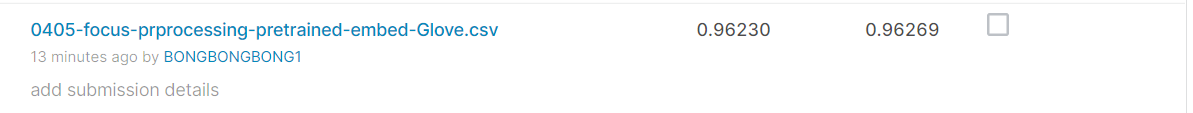